In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py

In [5]:
pth_registered = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\registered'

pth_indices = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat'

pth_pickle = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles'

pth_registered_list = [os.path.join(pth_registered, f) for f in os.listdir(pth_registered) if f.endswith('.mat')]
pth_indices_list = [os.path.join(pth_indices, f) for f in os.listdir(pth_indices) if f.endswith('.mat')]
pth_pickle_list = [os.path.join(pth_pickle, f) for f in os.listdir(pth_pickle) if f.endswith('.pkl')]

temp = [f[-8:-4] for f in os.listdir(pth_pickle)]

# prune if not in pickle list
skipped = [193] # this is an error propogated from some im_stack thing, should fix in future
pth_pickle_list_2 = [f for i,f in enumerate(pth_pickle_list) if i not in skipped]
#pth_registered_list_2 = [f for i,f in enumerate(pth_registered_list) if i not in skipped]
#pth_indices_list_2 = [f for i,f in enumerate(pth_indices_list) if i not in skipped]

In [6]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

In [7]:
print(len(pth_registered_list))
print(len(pth_indices_list))
print(len(pth_pickle_list_2))

1151
1152
1152


In [8]:
for i in range(len(pth_pickle_list)):
    print(pth_registered_list[i])
    print(pth_indices_list_2[i])
    print(pth_pickle_list[i])
    print()

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\registered\xy_inds_0001.mat


NameError: name 'pth_indices_list_2' is not defined

In [23]:
print(pth_registered_list[ind])
print(pth_indices_list[ind])
print(pth_pickle_list_2[ind])

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\registered\xy_inds_0014.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0014.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0014.pkl


In [24]:
ind = 500

reg_coord = load_var_from_mat(pth_registered_list[ind], 'xye')
inds = np.transpose(load_var_from_mat(pth_indices_list[ind], 'inds'))
with open(pth_pickle_list_2[ind], 'rb') as f:
    df = pickle.load(f)

In [25]:
print(len(reg_coord))
print(len(inds))

878580
878580


In [26]:
len(df)

878582

In [41]:
df2 = df.iloc[list(inds)]

ValueError: output array does not match result of ndarray.take

In [42]:
list(inds)

[array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([4]),
 array([5]),
 array([6]),
 array([7]),
 array([8]),
 array([9]),
 array([10]),
 array([11]),
 array([12]),
 array([13]),
 array([14]),
 array([15]),
 array([16]),
 array([17]),
 array([18]),
 array([19]),
 array([20]),
 array([21]),
 array([22]),
 array([23]),
 array([24]),
 array([25]),
 array([26]),
 array([27]),
 array([28]),
 array([29]),
 array([30]),
 array([31]),
 array([32]),
 array([33]),
 array([34]),
 array([35]),
 array([36]),
 array([37]),
 array([38]),
 array([39]),
 array([40]),
 array([41]),
 array([42]),
 array([43]),
 array([44]),
 array([45]),
 array([46]),
 array([47]),
 array([48]),
 array([49]),
 array([50]),
 array([51]),
 array([52]),
 array([53]),
 array([54]),
 array([55]),
 array([56]),
 array([57]),
 array([58]),
 array([59]),
 array([60]),
 array([61]),
 array([62]),
 array([63]),
 array([64]),
 array([65]),
 array([66]),
 array([67]),
 array([68]),
 array([69]),
 array([70]),
 array([71]),
 a

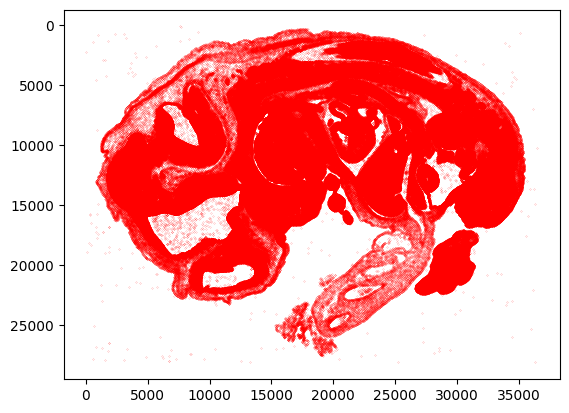

In [36]:
plt.scatter(df['Centroid_x'], df['Centroid_y'], s=0.01, c='r')
plt.gca().invert_yaxis()

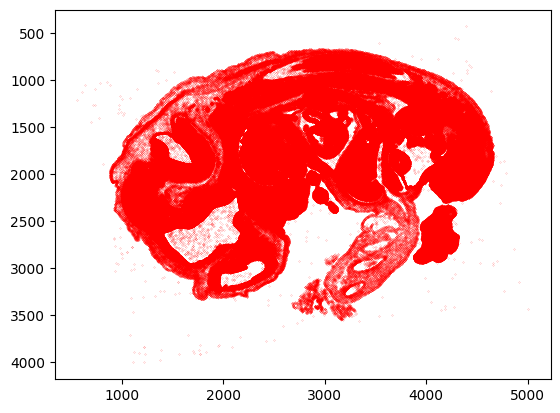

In [37]:
plt.scatter(reg_coord[:,0], reg_coord[:,1], s=0.01, c='r')
plt.gca().invert_yaxis()